In [1]:
import scipy.io as sio 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Example of loading one set of data. This script was written in a for loop because so then you can load more than one data here. 
filenames = ['S1_ME_run2'] 
ERPS_col = []

for i in filenames:
    mat_contents = sio.loadmat(i)

    #EEG Signal
    len(mat_contents['EEG'][0][0][15])
    raw_EEG = mat_contents['EEG'][0][0][15]
    raw_EEG = np.transpose(raw_EEG, (2, 0, 1))  # 35 epochs x 61 channels x 3584 time points(around 7s) 

    all_epoch = mat_contents['EEG'][0][0][28][0]

    # Event latency
    mat_contents['EEG'][0][0][28][0][0][2]
    # Event type
    mat_contents['EEG'][0][0][28][0][0][1][0]


    event_type = []
    
    for i in np.arange(len(all_epoch)):
        event = all_epoch[i]
        latency_list = event[2][0]
        type_list = event[1][0]

        event_type.append(type_list[-1])
        
    condition_type = np.unique(np.array(event_type)) 
    ## 1536 = elbow flexion, 1537 = elbow extension, 1538 = supination, 1539 = pronation, 1540 = hand close, 1541 = hand open, 1542 = rest
    

    # conditions contains all the epoch types according to the order above. 
    conditions = []
    for condition in condition_type:
        condition_index = np.where(np.array(event_type) == condition)
        condition_data = list( raw_EEG[i] for i in condition_index[0])
        conditions.append(condition_data)    

    for i in np.arange(len(conditions)):
        conditions[i] = np.transpose(conditions[i], (1, 0, 2)) # put all formats back to 61 channels x # trials x 3584 data points

So now, the dimension of this "conditions" variable would be 7(movement types) x 61 channels x # trials x 3584 data points. The order of the stored movement type would be in the same as printed above. The meaning of each coding is explained in the code above as well. Please refer to the data description file written by the original author to help interpreting these movements/data. 

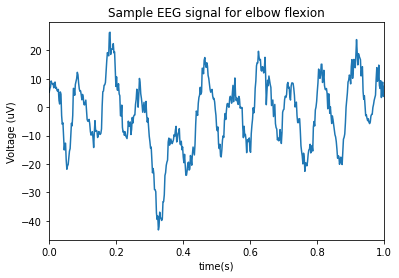

In [8]:
# An example to plot a EEG signal

plt.plot(np.arange(0, 7, 1/512), conditions[0][60][0])
plt.xlim([0, 1])
plt.xlabel('time(s)')
plt.ylabel('Voltage (uV)')
plt.title('Sample EEG signal for elbow flexion')
plt.show()

In the plot above, we have plotted the EEG signal from the F3 channel for first trial of the elbow flexion movement. Note that the total length of trial is 7 second and I only show the first second in the plot. 